# RFM Анализ

In [102]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

In [103]:
df = pd.read_excel('C:/Users/Сергей/Desktop/for_clustering.xlsx')

In [104]:
df

,Id_client,InWeek_amount,InWeek_SKU,Checkinmonth_average,Checkamount_mean,Count_transac,Total_amount,Total_SKU_qnt,Count_departments,Count_shop,...,Cat_babyprod_share,Communication_3month,Response_communcation,SKU_LastMonthqnt,Checks_LastMonthqnt,Amount_LastMonth,Discount,Discount_LastMonth,_SEGMENT_,EM_SEGMENT
0,5743,269.53,46,2,102.93,119,12398.51,1114,26,4,...,0.08,1,1,60,12,963.01,1,1,2,2
1,5756,359.99,36,4,100.28,130,12959.65,1024,29,3,...,0.04,1,0,91,15,1534.69,1,1,2,2
2,5781,329.32,9,4,102.20,29,2963.88,170,24,1,...,0.11,1,1,13,2,1514.48,1,1,3,3
3,5801,385.81,51,8,48.85,404,19676.34,2486,33,3,...,0.03,1,0,68,35,1872.24,1,1,2,2
4,5808,310.28,8,4,108.58,25,2482.24,255,26,2,...,0.04,1,1,22,3,557.97,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27503,822495,334.31,17,2,193.45,31,6164.92,317,29,1,...,0.04,1,1,27,4,916.60,1,1,3,3
27504,822844,214.92,17,2,169.93,21,3653.61,412,25,1,...,0.05,1,1,37,5,488.53,1,1,1,1
27505,823011,530.77,13,2,271.03,25,7509.19,434,19,1,...,0.04,1,1,33,3,1100.92,1,0,3,3
27506,823218,374.44,23,2,254.52,33,8612.11,465,30,3,...,0.03,1,1,64,6,1442.23,1,1,3,3


In [105]:
df.columns

Index(['Id_client', 'InWeek_amount', 'InWeek_SKU', 'Checkinmonth_average',
       'Checkamount_mean', 'Count_transac', 'Total_amount', 'Total_SKU_qnt',
       'Count_departments', 'Count_shop', 'Count_city', 'Tenure',
       'SKU_meanbytransac', 'Amount_last6mnth', 'Check_qntlast6mnth',
       'SKU_price_mean', 'Gender', 'Age', 'Age_group', 'Interval_visit',
       'Days_pastvisit', 'Cat_householdchem_qnt', 'Cat_householdchem_amount',
       'Cat_householdchem_share', 'Cat_careproducts_qnt',
       'Cat_careproducts_amount', 'Cat_careproducts_share',
       'Cat_toiletries_qnt', 'Cat_toiletries_amount', 'Cat_toiletries_share',
       'Cat_healthwellnes_qnt', 'Cat_healthwellnes_amount',
       'Cat_healthwellnes_share', 'Cat_babyprod_qnt', 'Cat_babyprod_amount',
       'Cat_babyprod_share', 'Communication_3month', 'Response_communcation',
       'SKU_LastMonthqnt', 'Checks_LastMonthqnt', 'Amount_LastMonth',
       'Discount', 'Discount_LastMonth', '_SEGMENT_', 'EM_SEGMENT'],
      dtype

In [106]:
df = df[['Id_client','Count_transac','Total_amount','Days_pastvisit']]
df

,Id_client,Count_transac,Total_amount,Days_pastvisit
0,5743,119,12398.51,3
1,5756,130,12959.65,2
2,5781,29,2963.88,8
3,5801,404,19676.34,0
4,5808,25,2482.24,8
...,...,...,...,...
27503,822495,31,6164.92,6
27504,822844,21,3653.61,8
27505,823011,25,7509.19,7
27506,823218,33,8612.11,8


In [107]:
pd.options.display.float_format = "{:.2f}".format
df.describe(percentiles = [.2,.4,.6,.8,.9,.99])

,Id_client,Count_transac,Total_amount,Days_pastvisit
count,27508.00,27508.00,27508.00,27508.00
mean,210314.23,82.47,9595.76,5.29
std,121828.91,63.24,4715.29,4.55
min,5743.00,4.00,739.36,0.00
20%,84858.00,33.00,5322.82,2.00
40%,164778.60,54.00,7641.74,3.00
50%,211786.00,66.00,8820.70,4.00
60%,251111.20,80.00,10143.21,5.00
80%,330059.20,121.00,13657.15,8.00
90%,371309.90,162.00,16511.31,11.00


###### Распределение показателей на графиках

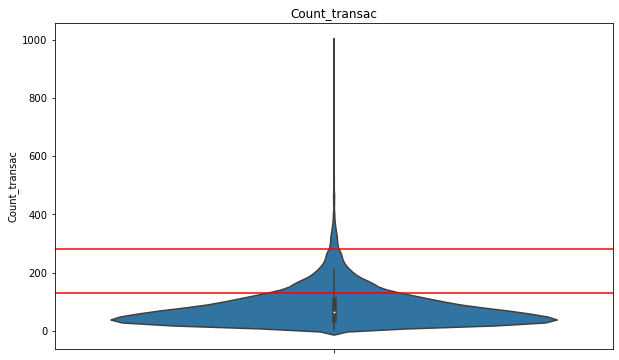

In [108]:
plt.figure(figsize=(10,6))
plt.title("Count_transac")
sns.axes_style("dark")
sns.violinplot(y=df["Count_transac"])
plt.axhline(130, color="red" )
plt.axhline(280, color="red" )
plt.show()

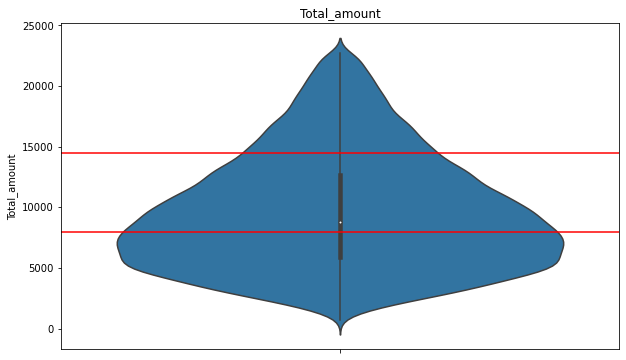

In [109]:
plt.figure(figsize=(10,6))
plt.title("Total_amount")
sns.axes_style("dark")
sns.violinplot(y=df["Total_amount"])
plt.axhline(8000, color="red" )
plt.axhline(14500, color="red" )
plt.show()

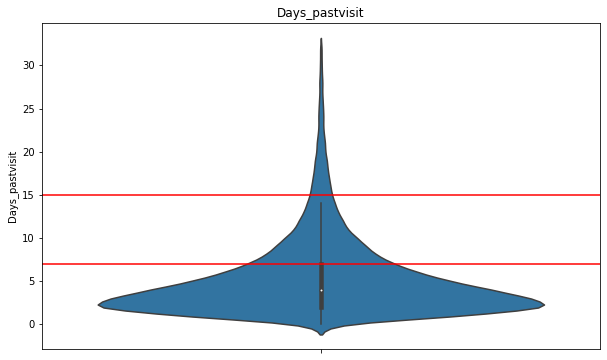

In [110]:
plt.figure(figsize=(10,6))
plt.title("Days_pastvisit")
sns.axes_style("dark")
sns.violinplot(y=df["Days_pastvisit"])
plt.axhline(7, color="red" )
plt.axhline(15, color="red" )
plt.show()

Исследуя таблицу с процентилями, а так же графики распределений, аудиторию на группы по указанным границам.

###### Пробная кластеризация

In [111]:
df.iloc[:,1:]

,Count_transac,Total_amount,Days_pastvisit
0,119,12398.51,3
1,130,12959.65,2
2,29,2963.88,8
3,404,19676.34,0
4,25,2482.24,8
...,...,...,...
27503,31,6164.92,6
27504,21,3653.61,8
27505,25,7509.19,7
27506,33,8612.11,8


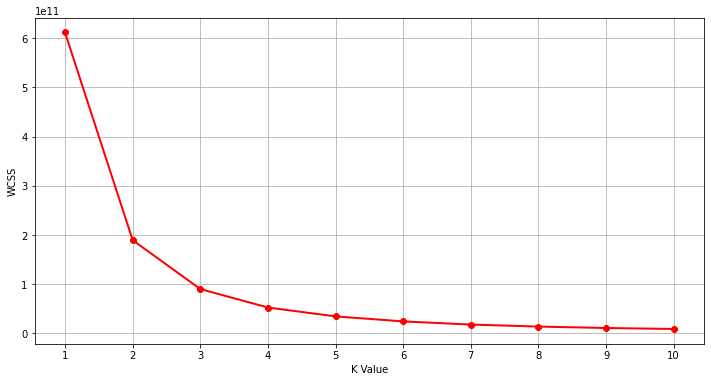

In [112]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df.iloc[:,1:])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

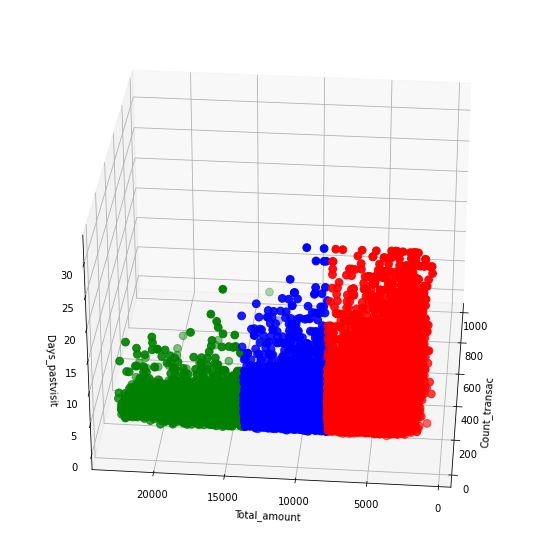

In [113]:
km = KMeans(n_clusters=3)
clusters = km.fit_predict(df.iloc[:,1:])
df["label"] = clusters


from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Count_transac[df.label == 0], df["Total_amount"][df.label == 0], df["Days_pastvisit"][df.label == 0], c='blue', s=60)
ax.scatter(df.Count_transac[df.label == 1], df["Total_amount"][df.label == 1], df["Days_pastvisit"][df.label == 1], c='red', s=60)
ax.scatter(df.Count_transac[df.label == 2], df["Total_amount"][df.label == 2], df["Days_pastvisit"][df.label == 2], c='green', s=60)
ax.view_init(30, 185)
plt.xlabel("Count_transac")
plt.ylabel("Total_amount")
ax.set_zlabel('Days_pastvisit')
plt.show()

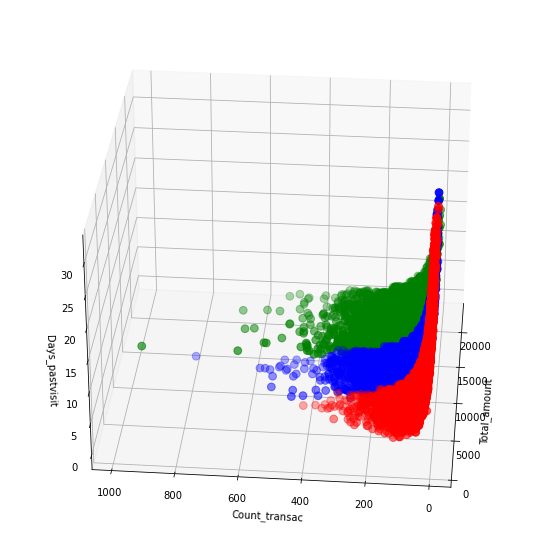

In [114]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df["Total_amount"][df.label == 0], df.Count_transac[df.label == 0], df["Days_pastvisit"][df.label == 0], c='blue', s=60)
ax.scatter(df["Total_amount"][df.label == 1], df.Count_transac[df.label == 1], df["Days_pastvisit"][df.label == 1], c='red', s=60)
ax.scatter(df["Total_amount"][df.label == 2], df.Count_transac[df.label == 2], df["Days_pastvisit"][df.label == 2], c='green', s=60)

ax.view_init(30, 185)
plt.xlabel("Total_amount")
plt.ylabel("Count_transac")
ax.set_zlabel('Days_pastvisit')
plt.show()

Метод K-Means позволяет подобрать оптимальные пороги кластеризации. Для RFM анализа 

In [115]:
df['M'] = [1 if x > 14500 else 0 for x in df['Total_amount']]
df.loc[df['Total_amount'] <= 14500, 'M'] = 2
df.loc[df['Total_amount'] <= 8000, 'M'] = 3
df

,Id_client,Count_transac,Total_amount,Days_pastvisit,label,M
0,5743,119,12398.51,3,0,2
1,5756,130,12959.65,2,0,2
2,5781,29,2963.88,8,1,3
3,5801,404,19676.34,0,2,1
4,5808,25,2482.24,8,1,3
...,...,...,...,...,...,...
27503,822495,31,6164.92,6,1,3
27504,822844,21,3653.61,8,1,3
27505,823011,25,7509.19,7,1,3
27506,823218,33,8612.11,8,0,2


In [116]:
df['F'] = [1 if x > 280 else 0 for x in df['Count_transac']]
df.loc[df['Count_transac'] <= 280, 'F'] = 2
df.loc[df['Count_transac'] <= 130, 'F'] = 3
df

,Id_client,Count_transac,Total_amount,Days_pastvisit,label,M,F
0,5743,119,12398.51,3,0,2,3
1,5756,130,12959.65,2,0,2,3
2,5781,29,2963.88,8,1,3,3
3,5801,404,19676.34,0,2,1,1
4,5808,25,2482.24,8,1,3,3
...,...,...,...,...,...,...,...
27503,822495,31,6164.92,6,1,3,3
27504,822844,21,3653.61,8,1,3,3
27505,823011,25,7509.19,7,1,3,3
27506,823218,33,8612.11,8,0,2,3


In [117]:
df['R'] = [3 if x > 15 else 0 for x in df['Days_pastvisit']]
df.loc[df['Days_pastvisit'] <= 15, 'R'] = 2
df.loc[df['Days_pastvisit'] <= 7, 'R'] = 1
df = df.drop(columns=['label'])
df

,Id_client,Count_transac,Total_amount,Days_pastvisit,M,F,R
0,5743,119,12398.51,3,2,3,1
1,5756,130,12959.65,2,2,3,1
2,5781,29,2963.88,8,3,3,2
3,5801,404,19676.34,0,1,1,1
4,5808,25,2482.24,8,3,3,2
...,...,...,...,...,...,...,...
27503,822495,31,6164.92,6,3,3,1
27504,822844,21,3653.61,8,3,3,2
27505,823011,25,7509.19,7,3,3,1
27506,823218,33,8612.11,8,2,3,2


Получили итоговую разбивку по RFM c учетом неоднородности данных клиентской базы